In [1]:
import pandas as pd
import numpy as np
from haversine import haversine
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/rspeare/miniconda3/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
north_pole = [90.,0.]
weight_limit = 1000.
sleigh_weight = 10.

In [3]:
def weighted_trip_length(stops, weights): 
    tuples = [tuple(x) for x in stops.values]
    # adding the last trip back to north pole, with just the sleigh weight
    tuples.append(north_pole)
    weights.append(sleigh_weight)
    
    dist = 0.0
    prev_stop = north_pole
    prev_weight = sum(weights)
    for location, weight in zip(tuples, weights):
        dist = dist + haversine(location, prev_stop) * prev_weight
        prev_stop = location
        prev_weight = prev_weight - weight
    if (np.sum(weights)> weight_limit):
        return np.inf
    else:
        return dist

def weighted_reindeer_weariness(all_trips):
    uniq_trips = all_trips.TripId.unique()
    
    if any(all_trips.groupby('TripId').Weight.sum() > weight_limit):
        raise Exception("One of the sleighs over weight limit!")
 
    dist = 0.0
    for t in uniq_trips:
        this_trip = all_trips[all_trips.TripId==t]
        dist = dist + weighted_trip_length(this_trip[['Latitude','Longitude']], this_trip.Weight.tolist())
    
    return dist    

def havsin(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lat1/= np.pi/180.
    lon1/= np.pi/180.
    lat2/= np.pi/180.
    lon2= np.pi/180.

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

# Read the Initial Data

In [655]:
gifts = pd.read_csv('gifts.csv')
sample_sub = pd.read_csv('sample_submission.csv')

all_trips = sample_sub.merge(gifts, on='GiftId')

In [930]:
naive_score=weighted_reindeer_weariness(all_trips)

In [1362]:
import imp
import mTSP

In [1363]:
imp.reload(mTSP)

<module 'mTSP' from '/Users/rspeare/Dropbox/research/Machine Learning/kaggle/santa2015/mTSP.py'>

In [1364]:
m=mTSP.mission(20)

In [1365]:
t=np.random.randint(1,1000)
this_trip = all_trips[all_trips.TripId==t]
%time w1=weighted_trip_length(this_trip[['Latitude','Longitude']], this_trip.Weight.tolist())
%time w2=m.trip_weariness(this_trip.GiftId.tolist())
print(w1/w2)

CPU times: user 794 µs, sys: 1 µs, total: 795 µs
Wall time: 800 µs
CPU times: user 234 µs, sys: 1 µs, total: 235 µs
Wall time: 238 µs
0.972121689889


In [1366]:
m.init_trips(40)

263358503722.01666

In [1369]:
print(m.WRW())
trips1=m.trips
weights1=m.tmap
m.swap(1,2)
trips2=m.trips
weights2=m.tmap
print(m.WRW())
m.swap(1,2)
trips3=m.trips
weights3=m.tmap
print(m.WRW())
m.swap(1,2)

263358800572.0
g,t,i,w:  [1, 2261, 19] [2, 479, 23]
263358503722.0
g,t,i,w:  [1, 479, 23] [2, 2261, 19]
WARNING! ILLEGAL SLEIGH WEIGHT
load:  1004.36074512
inf
g,t,i,w:  [1, 2261, 19] [2, 479, 23]


0

In [1368]:
print(trips1==trips3)
print(weights1==weights3)

True
True


In [1284]:
print(np.amax(m.get_weights()))
m.swap(1,2)

951.830252176


UnboundLocalError: local variable 'w1' referenced before assignment

In [1229]:
m.tmap[i2]

[87, 27]

In [1228]:
m.trips[336][10]==i1

True

In [1230]:
m.trips[87][27]==i2

True

In [1183]:
[m.wmap[g] for g in m.trips[1961]]

[23.0990242369,
 15.851420494999999,
 34.0637605939,
 1.6540915623800001,
 5.9934699421199999,
 1.0,
 9.7594931221800003,
 14.1489211553,
 38.989697693300002,
 1.0,
 3.9017360115499997,
 50.0,
 33.2111730333,
 31.719130311000001,
 1.0,
 20.803203226300003,
 41.858380025199999,
 32.659907362699997,
 30.4750700829,
 1.7971681932499999,
 6.2720794423399999,
 50.0,
 20.432521607000002,
 16.1744697733,
 22.844405012500001,
 21.943504449699997,
 32.884541656099998,
 34.696712358399999,
 2.3116878005800001,
 49.915892854700004,
 9.7525176814600005,
 50.0,
 10.271680803099999,
 49.309782528,
 1.0,
 22.715982070999999,
 38.6586545499,
 21.775911760500001,
 36.189931024899998,
 25.799222353200001,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0]

In [1095]:
print(i1,i2)
m.swap(i1,i2)
print(m.WRW())
m.swap(i1,i2)
print(m.WRW())
print(np.amax(m.get_weights()))

86947 79888
WARNING! ILLEGAL SLEIGH WEIGHT
inf
WARNING! ILLEGAL SLEIGH WEIGHT
WARNING! ILLEGAL SLEIGH WEIGHT
WARNING! ILLEGAL SLEIGH WEIGHT
inf
1003.25642244


In [1121]:
[self.wmap[g] for g in trip[0]]


NameError: name 'trip' is not defined

In [1071]:
np.where(np.array(m.gifts)==86350)

(array([29695]),)

In [1074]:
np.amax(m.get_weights())

1007.27861602902

In [1044]:
np.where(np.array(m.get_weights())>=990.)

(array([], dtype=int64),)

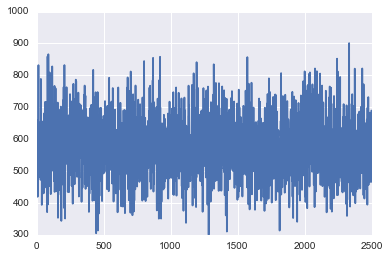

In [1009]:
plt.plot(m.get_weights())
plt.show()

In [1012]:
m0=100
Temp=10**6
c=np.zeros(m0)
for i in np.arange(m0):
    c[i]=m.propose_swap(Temp)
print('score: '+str(m.WRW()))

WARNING! ILLEGAL SLEIGH WEIGHT
WARNING! ILLEGAL SLEIGH WEIGHT
WARNING! ILLEGAL SLEIGH WEIGHT
WARNING! ILLEGAL SLEIGH WEIGHT
WARNING! ILLEGAL SLEIGH WEIGHT
WARNING! ILLEGAL SLEIGH WEIGHT
WARNING! ILLEGAL SLEIGH WEIGHT
WARNING! ILLEGAL SLEIGH WEIGHT
WARNING! ILLEGAL SLEIGH WEIGHT
WARNING! ILLEGAL SLEIGH WEIGHT
WARNING! ILLEGAL SLEIGH WEIGHT
WARNING! ILLEGAL SLEIGH WEIGHT
WARNING! ILLEGAL SLEIGH WEIGHT
WARNING! ILLEGAL SLEIGH WEIGHT
WARNING! ILLEGAL SLEIGH WEIGHT
WARNING! ILLEGAL SLEIGH WEIGHT
WARNING! ILLEGAL SLEIGH WEIGHT
WARNING! ILLEGAL SLEIGH WEIGHT
WARNING! ILLEGAL SLEIGH WEIGHT
WARNING! ILLEGAL SLEIGH WEIGHT
WARNING! ILLEGAL SLEIGH WEIGHT
WARNING! ILLEGAL SLEIGH WEIGHT
WARNING! ILLEGAL SLEIGH WEIGHT
WARNING! ILLEGAL SLEIGH WEIGHT
WARNING! ILLEGAL SLEIGH WEIGHT
WARNING! ILLEGAL SLEIGH WEIGHT
WARNING! ILLEGAL SLEIGH WEIGHT
WARNING! ILLEGAL SLEIGH WEIGHT
WARNING! ILLEGAL SLEIGH WEIGHT
score: inf


In [1013]:
np.where(np.array(m.get_weights() )>1000.)

(array([323]),)

In [987]:
m.get_weights()[2384]

2913.2577819447001

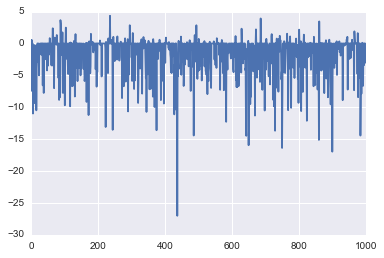

In [971]:
plt.plot(c/Temp)

In [ ]:
def burn_in(T,m,df,lbound,hbound):
    c=[]
    for i in np.arange(m):
        delta=propose_swap(df,Temp,lbound,hbound)
        c.append(delta)
    return np.array(c)

In [ ]:
m0=20000
var=5.01
print('log(T): '+str(np.log(Temp)/np.log(10.))+' var: '+str(var))
for n in np.arange(100):
    m0=np.amax([var,1.])**2.5*400
    mu=burn_in(Temp,m0,df0,0,len(df0))
    var=np.std(mu/Temp)
    print('        equilibriation('+str(count)+')  var: '+str(var))
    score2=weighted_reindeer_weariness(df0[all_trips.columns])
    print(score2)
    if (var < 5.):
        Temp*=.9
        print('log(T): '+str(np.log(Temp)/np.log(10.))+' var: '+str(var))
        count=0
    else:
        count+=m0

In [657]:
pickle.dump(tmap,open("tmap.pickle","wb"))                                        


In [588]:
dd={'A':1,'B':2}

In [589]:
dd.update({'A':3})
dd

{'A': 3, 'B': 2}

In [190]:
dmap={all_trips.iloc[i].GiftId: [all_trips.iloc[i].Latitude,all_trips.iloc[i].Longitude] for i in np.arange(len(all_trips))}

In [191]:
wmap={all_trips.iloc[i].GiftId: all_trips.iloc[i].Weight for i in np.arange(len(all_trips))}

In [215]:
import pickle
dmap={all_trips.iloc[i].GiftId: [all_trips.iloc[i].Latitude,all_trips.iloc[i].Longitude] for i in np.arange(len(all_trips))}
wmap={all_trips.iloc[i].GiftId: all_trips.iloc[i].Weight for i in np.arange(len(all_trips))}
pickle.dump(dmap,open("dmap.pickle","wb"))
pickle.dump(wmap,open("wmap.pickle","wb"))

In [212]:
mapp=pickle.load(open("dmap.pickle","rb"))

In [550]:
pickle.dump(tripz,open("trips0.pickle","wb"))


In [189]:
d[5]

[-69.854088412500005, 87.946877877299997]

In [177]:
d={i: i**2 for i in np.arange(5)}
d[2]

4

In [175]:
t.g[1][0]

7

In [98]:
d={1:1,2:1}

In [112]:
l.remove(2)
l

[1, 2, 2, 3, 4, 5]

In [54]:
.this_trip = all_trips[all_trips.TripId==0]
weighted_trip_length(this_trip[['Latitude','Longitude']], this_trip.Weight.tolist())
    

34131627.602258421

In [42]:
l=[1,2,3,4,5]

In [66]:
l.insert(1,2)

In [44]:
raise 

[1, 2, 2, 3, 4, 5]

# Initializiaton: Setup stops, Check for Validity

In [233]:
# Add lots of 'north pole' stops, concatenate them to the original gifts data frame
def initialize(frac):
    notValid=True
    while (notValid):
        seed1=np.insert(north_pole,0,-1)
        seed1=np.insert(seed1,3,0.)
        s=pd.DataFrame(seed1,index=gifts.columns.values).T
        s.head()
        s=pd.DataFrame(seed1,index=gifts.columns.values).T
        for i in np.arange(np.log(len(gifts)*frac)/np.log(2.)):
            s=pd.concat([s,s])
        print(len(s))
    
        dfc=pd.concat([gifts,s])
        dfc.head()
        
        # Now randomly distribute the stops
        dfc=dfc.iloc[np.random.permutation(len(dfc))]
        dfc.head()
    
        stops=np.where(dfc['GiftId']==-1)[0]
        
        dfc['tripW']=np.zeros(len(dfc))
        dfc['TripId']=np.zeros(len(dfc))

        ###### CHECK IF A VALID SET OF STOPS
        cumWeights=[]
    
        np.insert(stops,0,0)
        np.insert(stops,len(stops),len(dfc)+1)
    
        tripWeight=np.sum(dfc['Weight'].values[:stops[0]])
        cumWeights.append(tripWeight)
        dfc['tripW'].values[:stops[0]]=tripWeight
        dfc['TripId'].values[:stops[0]]=0
        
        for i in np.arange(len(stops)-1):
    #    print(i)
            tripWeight=np.sum(dfc['Weight'].values[stops[i]:stops[i+1]])
            cumWeights.append(tripWeight)
            dfc['tripW'].values[stops[i]:stops[i+1]]=tripWeight
            dfc['TripId'].values[stops[i]:stops[i+1]]=i
        
        tripWeight=np.sum(dfc['Weight'].values[stops[-1]:])
        cumWeights.append(tripWeight)
        dfc['tripW'].values[stops[-1]:]=tripWeight
        dfc['TripId'].values[stops[-1]:]=i+1

        cumWeights=np.array(cumWeights)
        
        if np.any(dfc['tripW'].values > 1000.-10.):
            print('Too much weight in the sleigh!')
            frac*=1.01
        else:
            print('legal set of stops')
            notValid=False
    if np.any(np.isnan(dfc)):
        print('WARNING THERE ARE NAN TRIP IDS')
    #print('calculating initial score fraction...relative to Naive')
    return dfc
   


# Two Opt Code: Swap two stops, see if valid and check for improvement

In [8]:
def swap2(i,j,dfc):
    for attr in ['GiftId','Latitude','Longitude','Weight']:
        tmpi=dfc.iloc[i][attr]
        tmpj=dfc.iloc[j][attr]
        dfc.iloc[i][attr]=tmpj
        dfc.iloc[j][attr]=tmpi

In [9]:
def propose_swap(dfc,Temp,lbound,hbound):
    """
    Propose a random Swap of two cities in the traveling salesmen problem
    """
    i1,i2=np.random.randint(lbound,high=hbound,size=2)
    trip0ID=dfc.iloc[i1]['TripId']
    trip1ID=dfc.iloc[i2]['TripId']
    trip0=dfc[dfc['TripId']==trip0ID]
    trip1=dfc[dfc['TripId']==trip1ID]

    dist1=weighted_trip_length(trip0[['Latitude','Longitude']], trip0.Weight.tolist())+weighted_trip_length(trip1[['Latitude','Longitude']], trip1.Weight.tolist())
    
    swap2(i1,i2,dfc)
    trip0ID=dfc.iloc[i1]['TripId']
    trip1ID=dfc.iloc[i2]['TripId']
    trip0=dfc[dfc['TripId']==trip0ID]
    trip1=dfc[dfc['TripId']==trip1ID]

    dist2=weighted_trip_length(trip0[['Latitude','Longitude']], trip0.Weight.tolist())+weighted_trip_length(trip1[['Latitude','Longitude']], trip1.Weight.tolist())

    if (dist2 < dist1):
#        print('accepted')
#        print(dist2-dist1)
        return (dist2 - dist1)
    else:
        prob=np.exp((dist1-dist2)/Temp)
        sample=np.random.rand()
        # Accept Swap with probability exp(-deltaD/T)
        if (sample < prob):
#            print('accepted with probability :',prob)
#            print(dist2-dist1)
            return (dist2 - dist1)
        else:
#            print('rejected with probability :',1.-prob)
            swap2(i1,i2,dfc)
            return 0.
    # should never get here
    return (dist2 - dist1)

In [10]:
def running_mean(x,N):
    return np.convolve(x, np.ones((N,))/N, mode='valid')

# The Burn In Process

In [235]:
df0=initialize(0.02)
weighted_reindeer_weariness(df0[all_trips.columns])/best_score

2048
Too much weight in the sleigh!
2048
Too much weight in the sleigh!
2048
Too much weight in the sleigh!
4096
Too much weight in the sleigh!
4096
Too much weight in the sleigh!
4096
Too much weight in the sleigh!
4096
Too much weight in the sleigh!
4096
Too much weight in the sleigh!
4096
Too much weight in the sleigh!
4096
Too much weight in the sleigh!
4096
Too much weight in the sleigh!
4096
Too much weight in the sleigh!
4096
Too much weight in the sleigh!
4096
Too much weight in the sleigh!
4096
Too much weight in the sleigh!
4096
Too much weight in the sleigh!
4096
Too much weight in the sleigh!
4096
Too much weight in the sleigh!
4096
Too much weight in the sleigh!
4096
Too much weight in the sleigh!
4096
Too much weight in the sleigh!
4096
Too much weight in the sleigh!
4096
Too much weight in the sleigh!
4096
Too much weight in the sleigh!
4096
Too much weight in the sleigh!
4096
Too much weight in the sleigh!
4096
Too much weight in the sleigh!
4096
Too much weight in the 

8.0906658690160516

In [12]:
def burn_in(T,m,df,lbound,hbound):
    c=[]
    for i in np.arange(m):
        delta=propose_swap(df,Temp,lbound,hbound)
        c.append(delta)
    return np.array(c)

In [ ]:
count=0
Temp=10**5.5
var=100.

In [70]:
count=0
var=5.01
print('log(T): '+str(np.log(Temp)/np.log(10.))+' var: '+str(var))
for n in np.arange(100):
    m0=int(np.amax([var,1.])**2.5*400)
    mu=burn_in(Temp,m0,df0,0,len(df0))
    var=np.std(mu/Temp)
    print('        equilibriation('+str(count)+')  var: '+str(var))
    score2=weighted_reindeer_weariness(df0[all_trips.columns])
    print(score2)
    if (var < 5.):
        Temp*=.9
        print('log(T): '+str(np.log(Temp)/np.log(10.))+' var: '+str(var))
        count=0
    else:
        count+=m0
#    plt.plot(mu/Temp)
#score2=weighted_reindeer_weariness(df0[all_trips.columns])
#print(score2/best_score)
plt.plot(mu/Temp)
#print(np.mean(mu/Temp),np.std(mu/Temp))
plt.show()

log(T): 4.15048673886 var: 5.01


KeyboardInterrupt: 

In [73]:
df1=initialize(0.1)

16384
legal set of stops


In [74]:
count=0
var=5.01
Temp=10**5.5
print('log(T): '+str(np.log(Temp)/np.log(10.))+' var: '+str(var))
for n in np.arange(100):
    m0=int(np.amax([var,1.])**2.5*400)
    mu=burn_in(Temp,m0,df1,0,len(df1))
    var=np.std(mu/Temp)
    print('        equilibriation('+str(count)+')  var: '+str(var))
    score2=weighted_reindeer_weariness(df1[all_trips.columns])
    print(score2)
    if (var < 5.):
        Temp*=.9
        print('log(T): '+str(np.log(Temp)/np.log(10.))+' var: '+str(var))
        count=0
    else:
        count+=m0


log(T): 5.5 var: 5.01
        equilibriation(0)  var: 4.17362294419
86786308756.4
log(T): 5.45424250944 var: 4.17362294419


KeyboardInterrupt: 

In [72]:
df0.to_csv('santas_route_3.csv')

In [76]:
np.savetxt('submission0.csv',df1[df1['GiftId']!=-1][['GiftId','TripId']].values.astype(np.int),fmt='%2.0d',delimiter=',',header='GiftId,TripId')
%more submission0.csv

# Parellelized Burn in

In [ ]:
from IPython import parallel

rc = parallel.Client()
all_engines = rc[:]
lbv = rc.load_balanced_view()
lbv.block = True

In [ ]:
@lbv.parallel()
def f(x):
    return 10.0*x**4

In [ ]:
f.map(np.arange(10**2))

In [908]:
def power(base, exponent):
    return base ** exponent

from functools import partial

square = partial(power, exponent=2)
cube = partial(power, exponent=3)

def test_partials():
    assert square(2) == 4
    assert cube(2) == 8